In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support,f1_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [25]:
df = pd.read_csv('/content/drive/MyDrive/alda project/processed_data.csv')

In [26]:
# Define the ordinal mapping for 'c_charge_degree'
ordinal_mapping = {
    "(F3)": 6,  # Highest severity
    "(F2)": 5,
    "(F1)": 4,
    "(M3)": 3,
    "(M2)": 2,
    "(M1)": 1   # Lowest severity
}

# Apply the ordinal mapping to the 'c_charge_degree' column
df['c_charge_degree'] = df['c_charge_degree'].astype(str).map(ordinal_mapping)

In [27]:
df.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,v_screening_date,priors_count.1,event
0,1,miguel hernandez,miguel,hernandez,14/08/2013,Male,18/04/1947,69,Greater than 45,Other,...,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,14/08/2013,0,0
1,2,michael ryan,michael,ryan,31/12/2014,Male,06/02/1985,31,25 - 45,Caucasian,...,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,31/12/2014,0,0
2,3,kevon dixon,kevon,dixon,27/01/2013,Male,22/01/1982,34,25 - 45,African-American,...,Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,27/01/2013,0,1
3,4,ed philo,ed,philo,14/04/2013,Male,14/05/1991,24,Less than 25,African-American,...,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,14/04/2013,4,0
4,5,marcu brown,marcu,brown,13/01/2013,Male,21/01/1993,23,Less than 25,African-American,...,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,13/01/2013,1,0


## Shyamal's work

In [28]:
# pd.get_dummies(df['race'], dtype = 'float')

In [29]:
df1 = df[["age", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "race", "is_recid"]]  # Features including race
df1 = df1[(df1.race == 'African-American') | (df1.race == 'Caucasian')]

In [30]:
# Split the data into features and target variable
X = df1.drop(columns = ['is_recid'])  # Features including race
y = df1['is_recid']

In [31]:
y.value_counts()

is_recid
0    6213
1    3330
Name: count, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train

,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,race
6457,27,0,0,0,5,Caucasian
4962,34,0,0,0,2,Caucasian
5923,38,0,0,0,0,Caucasian
95,34,0,0,0,0,Caucasian
1579,28,0,0,0,1,African-American
...,...,...,...,...,...,...
6781,40,0,0,0,0,African-American
6137,33,0,0,0,0,Caucasian
6363,20,0,0,0,0,Caucasian
1021,27,0,0,0,13,African-American


In [34]:
numerical_features = X_train.select_dtypes(include = 'int64').columns
categorical_features = X_train.select_dtypes(include = 'object').columns

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

transformer = ColumnTransformer(transformers=[
    ('numeric',numerical_pipeline, numerical_features),
    ('categoric', categorical_pipeline, categorical_features)
])

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)


In [35]:
X_train_preprocessed.shape

(7634, 7)

In [36]:
# Initialize the Multilayer Neural Network classifier
base_logistic_model = LogisticRegression(random_state=42)

# Train the model
base_logistic_model.fit(X_train_preprocessed, y_train)

# Predict using the trained model
base_logistic_y_pred = base_logistic_model.predict(X_test_preprocessed)

f1_score(y_test, base_logistic_y_pred)

0.3778014941302028

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, base_logistic_y_pred)
report = classification_report(y_test, base_logistic_y_pred, digits = 4)
cm = confusion_matrix(y_test, base_logistic_y_pred)

# Output the evaluation results
print("Base Logistic Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)

Base Logistic Classifier
Accuracy: 0.69
              precision    recall  f1-score   support

           0     0.7028    0.9222    0.7976      1246
           1     0.6460    0.2670    0.3778       663

    accuracy                         0.6946      1909
   macro avg     0.6744    0.5946    0.5877      1909
weighted avg     0.6830    0.6946    0.6518      1909



In [38]:
# Initialize the Multilayer Neural Network classifier
base_mlp_model = MLPClassifier(random_state=42)

# Train the model
base_mlp_model.fit(X_train_preprocessed, y_train)

# Predict using the trained model
base_mlp_y_pred = base_mlp_model.predict(X_test_preprocessed)

f1_score(y_test, base_mlp_y_pred)

0.49310027598896045

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, base_mlp_y_pred)
report = classification_report(y_test, base_mlp_y_pred, digits = 4)
cm = confusion_matrix(y_test, base_mlp_y_pred)

# Output the evaluation results
print("Base MLP Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)

Base MLP Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0     0.7340    0.8748    0.7982      1246
           1     0.6321    0.4042    0.4931       663

    accuracy                         0.7114      1909
   macro avg     0.6830    0.6395    0.6457      1909
weighted avg     0.6986    0.7114    0.6923      1909



## Introducing Model Biasing with Custom Loss function

- Here our target is to handle inherit bias in the dataset. With custom loss function we are addressing african-americans false associativity with high risk of recomminting crime.
- Using the custom loss function we try to penalize our model on prediction of high risk given african american race. Using this we are essentially making changes to class weights and then train the model again.

### 1. Custom Loss with Logistic Regression

In [40]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Define custom loss function with bias penalty
def custom_loss(y_true, y_pred, sensitive_feature, lambda_fairness, race_penalty):
    # Compute logistic loss
    logistic_loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    # Compute fairness term (demographic parity)
    sensitive_group = (sensitive_feature == 1)  # For binary sensitive feature (e.g., race)
    y_pred_sensitive = y_pred[sensitive_group]
    y_pred_nonsensitive = y_pred[~sensitive_group]
    fairness_term = np.abs(np.mean(y_pred_sensitive) - np.mean(y_pred_nonsensitive))

    # Add fairness term to the loss function
    loss = logistic_loss + lambda_fairness * fairness_term

    # Add bias penalty for African American defendants predicted as high risk
    african_american_high_risk = (sensitive_feature == 1) & (y_pred == 1)
    loss += race_penalty * np.sum(african_american_high_risk)

    return loss

# Define fairness regularization parameter and race penalty
lambda_fairness = 0.4
race_penalty = 0.8  # Adjust the penalty as needed
race_feature_train = np.array([float(x[5]) for x in X_train_preprocessed]) #african-american race
# Initialize fairness-aware logistic regression model
bias_logistic_model = LogisticRegression()

# Calculate sample weights
sample_weights = np.ones_like(y_train, dtype =float)
sample_weights[race_feature_train == 1.0] *= race_penalty

# Train model with sample_weights
bias_logistic_model.fit(X_train_preprocessed, y_train, sample_weight=sample_weights)
biased_logistic_y_pred = bias_logistic_model.predict(X_test_preprocessed)
# Evaluate the model
accuracy = accuracy_score(y_test, biased_logistic_y_pred)
report = classification_report(y_test, biased_logistic_y_pred, digits = 4)
cm = confusion_matrix(y_test, biased_logistic_y_pred)

# Output the evaluation results
print("Base Logistic Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Base Logistic Classifier
Accuracy: 0.70
              precision    recall  f1-score   support

           0     0.7039    0.9213    0.7981      1246
           1     0.6475    0.2715    0.3826       663

    accuracy                         0.6957      1909
   macro avg     0.6757    0.5964    0.5903      1909
weighted avg     0.6843    0.6957    0.6538      1909



### 2. Custom loss with MLPClassifier

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import numpy as np

# Define custom loss function with bias penalty
def custom_loss(y_true, y_pred, sensitive_feature, lambda_fairness, race_penalty):
    # Compute logistic loss
    logistic_loss = log_loss(y_true, y_pred)

    # Add bias penalty for African American defendants predicted as high risk
    african_american_high_risk = (sensitive_feature == 1) & (y_pred == 1)
    loss = logistic_loss + race_penalty * np.sum(african_american_high_risk)

    return loss

# Load data (X_train, y_train, race_feature_train)
# Preprocess data as needed

# Define fairness regularization parameter and race penalty
lambda_fairness = 0.3
race_penalty = 0.9 # Adjust the penalty as needed

# Initialize Multilayer Neural Network classifier
mlp_model = MLPClassifier(random_state=42)

# Define a wrapper function to pass custom loss to the optimizer
def custom_loss_wrapper(y_true, y_pred):
    return custom_loss(y_true, y_pred, race_feature_train, lambda_fairness, race_penalty)

# Train the model with custom loss function
mlp_model.loss_ = custom_loss_wrapper

# Fit the model
mlp_model.fit(X_train_preprocessed, y_train)

# Predict using the trained model
biased_mlp_y_pred = mlp_model.predict(X_test_preprocessed)
# Evaluate the model
accuracy = accuracy_score(y_test, biased_mlp_y_pred)
report = classification_report(y_test, biased_mlp_y_pred, digits = 4)
cm = confusion_matrix(y_test, biased_mlp_y_pred)

# Output the evaluation results
print("Biased MLP Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Biased MLP Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0     0.7340    0.8748    0.7982      1246
           1     0.6321    0.4042    0.4931       663

    accuracy                         0.7114      1909
   macro avg     0.6830    0.6395    0.6457      1909
weighted avg     0.6986    0.7114    0.6923      1909



## Comparison

In [42]:
## logistic Regression Classifier

accuracy = accuracy_score(y_test, base_logistic_y_pred)
report = classification_report(y_test, base_logistic_y_pred, digits = 4)
cm = confusion_matrix(y_test, base_logistic_y_pred)

# Output the evaluation results
print("Base Logistic Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)
print('----------------------------------------------------------------------------')
# Evaluate the model
accuracy = accuracy_score(y_test, biased_logistic_y_pred)
report = classification_report(y_test, biased_logistic_y_pred, digits = 4)
cm = confusion_matrix(y_test, biased_logistic_y_pred)

# Output the evaluation results
print("Biased Logistic Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)



Base Logistic Classifier
Accuracy: 0.69
              precision    recall  f1-score   support

           0     0.7028    0.9222    0.7976      1246
           1     0.6460    0.2670    0.3778       663

    accuracy                         0.6946      1909
   macro avg     0.6744    0.5946    0.5877      1909
weighted avg     0.6830    0.6946    0.6518      1909

----------------------------------------------------------------------------
Biased Logistic Classifier
Accuracy: 0.70
              precision    recall  f1-score   support

           0     0.7039    0.9213    0.7981      1246
           1     0.6475    0.2715    0.3826       663

    accuracy                         0.6957      1909
   macro avg     0.6757    0.5964    0.5903      1909
weighted avg     0.6843    0.6957    0.6538      1909



In [43]:
## MLP Classifier
accuracy = accuracy_score(y_test, base_mlp_y_pred)
report = classification_report(y_test, base_mlp_y_pred, digits = 4)
cm = confusion_matrix(y_test, base_mlp_y_pred)

# Output the evaluation results
print("Base MLP Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)
print('----------------------------------------------------------------------------')

accuracy = accuracy_score(y_test, biased_mlp_y_pred)
report = classification_report(y_test, biased_mlp_y_pred, digits = 4)
cm = confusion_matrix(y_test, biased_mlp_y_pred)

# Output the evaluation results
print("Biased MLP Classifier")
print(f"Accuracy: {accuracy:.2f}")
print(report)


Base MLP Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0     0.7340    0.8748    0.7982      1246
           1     0.6321    0.4042    0.4931       663

    accuracy                         0.7114      1909
   macro avg     0.6830    0.6395    0.6457      1909
weighted avg     0.6986    0.7114    0.6923      1909

----------------------------------------------------------------------------
Biased MLP Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0     0.7340    0.8748    0.7982      1246
           1     0.6321    0.4042    0.4931       663

    accuracy                         0.7114      1909
   macro avg     0.6830    0.6395    0.6457      1909
weighted avg     0.6986    0.7114    0.6923      1909



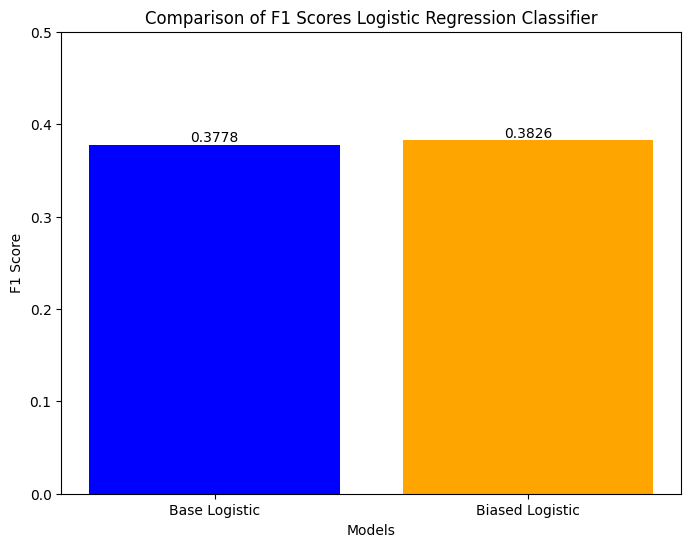

In [48]:
## F1-score comparison graph

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Calculate F1 scores for both models
f1_base_logistic = f1_score(y_test, base_logistic_y_pred)
f1_biased_logistic = f1_score(y_test, biased_logistic_y_pred)
# F1 scores for both models
f1_scores_logistic = [f1_base_logistic, f1_biased_logistic]

# Model labels
models = ['Base Logistic', 'Biased Logistic']

# Colors for the bars
colors = ['blue', 'orange']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores_logistic, color=colors)

# Adding text labels for each bar
for i in range(len(models)):
    plt.text(i, f1_scores_logistic[i], f"{f1_scores_logistic[i]:.4f}", ha='center', va='bottom')

# Adding a title and labels
plt.title('Comparison of F1 Scores Logistic Regression Classifier')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show plot
plt.ylim(0, 0.5)  # Set y-axis limit to highlight the difference
plt.show()

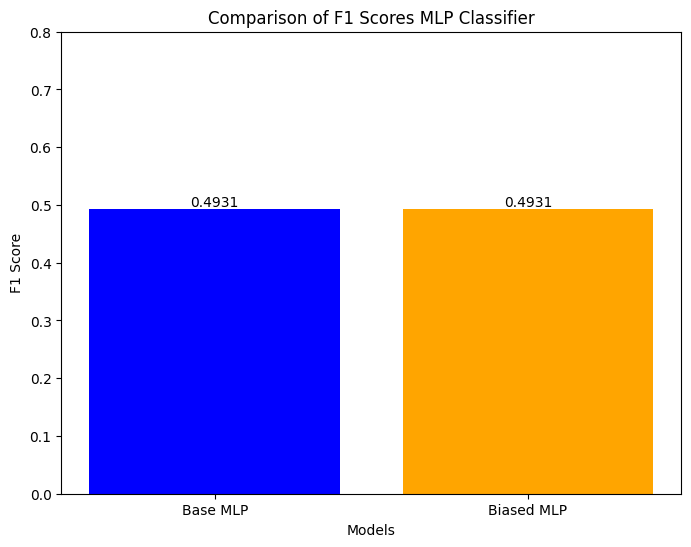

In [50]:
# Calculate F1 scores for both models
f1_base_mlp = f1_score(y_test, base_mlp_y_pred)
f1_biased_mlp = f1_score(y_test, biased_mlp_y_pred)
# F1 scores for both models
f1_scores_mlp = [f1_base_mlp, f1_biased_mlp]

# Model labels
models = ['Base MLP', 'Biased MLP']

# Colors for the bars
colors = ['blue', 'orange']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, f1_scores_mlp, color=colors)

# Adding text labels for each bar
for i in range(len(models)):
    plt.text(i, f1_scores_mlp[i], f"{f1_scores_mlp[i]:.4f}", ha='center', va='bottom')

# Adding a title and labels
plt.title('Comparison of F1 Scores MLP Classifier')
plt.xlabel('Models')
plt.ylabel('F1 Score')

# Show plot
plt.ylim(0, 0.8)  # Set y-axis limit to highlight the difference
plt.show()